In [1]:
import pandas as pd

# Multivariate Linear Regression

### Train a multivariate linear regression model for this data and shows the result & evaluation.
- Take dataset: train.csv from [Link](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv)
- One Hot Encoding, Fill NA
- Separate into X_train, X_test, y_train, y_test (y = “SalePrice”) with proportion: 60-40
- Train regression model with X_train and y_train
- Evaluate the result with 3 metrics
- Explain or Interpret the linear correlation between 3 features and the target (“SalePrice”)

### Take dataset: train.csv from Link

In [4]:
df=pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

### One Hot Encoding, Fill NA

In [7]:
#one hot encoding
df = pd.get_dummies(df)

In [11]:
df.head(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [10]:
df.tail(5)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0
1459,1460,20,75.0,9937,5,6,1965,1965,0.0,830,...,0,0,0,1,0,0,0,0,1,0


In [9]:
df.sample(10)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
867,868,20,85.0,6970,4,5,1961,1961,0.0,932,...,0,0,0,1,0,0,0,0,1,0
1023,1024,120,43.0,3182,7,5,2005,2006,14.0,16,...,0,0,0,1,0,0,0,0,1,0
82,83,20,78.0,10206,8,5,2007,2007,468.0,33,...,0,0,0,1,0,0,0,0,1,0
1205,1206,20,90.0,14684,7,7,1990,1991,234.0,485,...,0,0,0,1,0,0,0,0,1,0
1301,1302,70,NaN,7500,6,7,1942,1950,0.0,547,...,0,0,0,1,0,0,0,0,1,0
920,921,60,70.0,8462,6,5,1994,1994,105.0,814,...,0,0,0,1,0,0,0,0,1,0
1303,1304,20,73.0,8688,7,5,2005,2005,228.0,0,...,0,0,0,1,0,0,0,0,1,0
1273,1274,80,124.0,11512,6,7,1959,2006,84.0,719,...,0,0,0,1,0,0,0,0,1,0
895,896,60,71.0,7056,6,5,1963,1963,415.0,400,...,0,0,0,1,0,0,0,0,1,0
1114,1115,20,90.0,5400,5,7,1954,2000,0.0,415,...,0,0,0,1,0,0,0,0,1,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 290 entries, Id to SaleCondition_Partial
dtypes: float64(3), int64(35), uint8(252)
memory usage: 792.9 KB


In [14]:
#fill the NA with 0 value 
df=df.fillna(0)
df.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0


In [15]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,...,0.003425,0.083562,0.002055,0.867808,0.069178,0.002740,0.008219,0.013699,0.820548,0.085616
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,...,0.058440,0.276824,0.045299,0.338815,0.253844,0.052289,0.090317,0.116277,0.383862,0.279893
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Separate into X_train, X_test, y_train, y_test (y = “SalePrice”) with proportion: 60-40

In [17]:
from sklearn.model_selection import train_test_split#split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(df.drop(['SalePrice'],axis=1), df['SalePrice'], test_size=0.4, random_state=101)#split the dataset into train and test
#show the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(876, 289)
(584, 289)
(876,)
(584,)


### Train regression model with X_train and y_train

In [19]:
from sklearn import datasets, linear_model, metrics
from sklearn.linear_model import LinearRegression #import the linear regression model
lm = linear_model.LinearRegression()#create the linear regression model
lm.fit(X_train,y_train)#fit the model with the train dataset
#regression coefficients
print('Coefficients: \n', lm.coef_)#show the coefficient of the model
#intercept
print('Intercept: \n', lm.intercept_)#show the intercept of the model


Coefficients: 
 [ 2.22562302e-01 -6.44078052e+01  3.52487120e+00  5.92326025e-01
  7.75742534e+03  5.29652696e+03  3.08677226e+02  8.98737796e+01
  2.30586017e+01  6.67987034e+00  1.28268035e+01 -6.67200855e+00
  1.28346593e+01  2.44454849e+01  2.11981997e+01 -2.29743082e+01
  2.26694690e+01  3.11753501e+02 -1.90872619e+03  2.30921228e+03
  1.81037211e+03 -4.51830809e+03 -1.99918827e+04  3.65863819e+03
  5.03601428e+03 -1.60329178e+02  3.87891757e+03  2.76488879e+01
  1.73443169e+01  1.11570087e+01  1.93172036e+01  4.58520074e+01
  1.89516856e+01  6.07389506e+03  5.44259457e+00 -3.57056322e+02
 -3.54313427e+02 -1.79339675e+04  1.65728478e+04  1.51237288e+04
 -5.71142534e+03 -8.05118372e+03 -1.46839780e+04  1.46839780e+04
  6.51045135e+03 -1.36486968e+02 -2.58639007e+03  8.18367589e+02
  5.54146477e+03 -3.77344230e+03 -5.78002417e+03  3.30747375e+03
 -1.26052056e+03  3.73307097e+03  2.21975740e+04 -2.21975740e+04
  2.83184549e+03  6.19273189e+03 -1.09705585e+04  2.16326795e+03
 -2.17286

### Evaluate the result with 3 metrics(MAE, MSE, RMSE)

In [20]:
#MAE
from sklearn import metrics #Import the metrics
predictions = lm.predict(X_test) #predict the test dataset

print('MAE:', metrics.mean_absolute_error(y_test, predictions)) #show the MAE of the model with the test dataset and the prediction of the model

MAE: 20229.793380550735


In [21]:
#MSE
print('MSE:', metrics.mean_squared_error(y_test, predictions))#show the MSE of the model with the test dataset and the prediction of the model

MSE: 2204205585.473426


In [23]:
#RMSE
import numpy as np
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions))) #show the RMSE of the model with the test dataset and the prediction of the model

RMSE: 46948.967885070975


### Explain or Interpret the linear correlation between 3 features and the target (“SalePrice”)

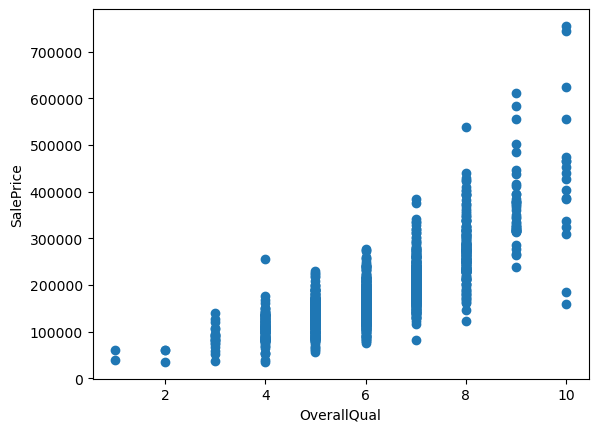

In [26]:
#The 3 features are: OverallQual, GrLivArea, and GarageCars
#OverallQual
import matplotlib.pyplot as plt
plt.scatter(df['OverallQual'],df['SalePrice']) #plot the scatter plot of OverallQual and SalePrice
plt.xlabel('OverallQual') #label the x axis
plt.ylabel('SalePrice') #label the y axis
plt.show() #show the plot

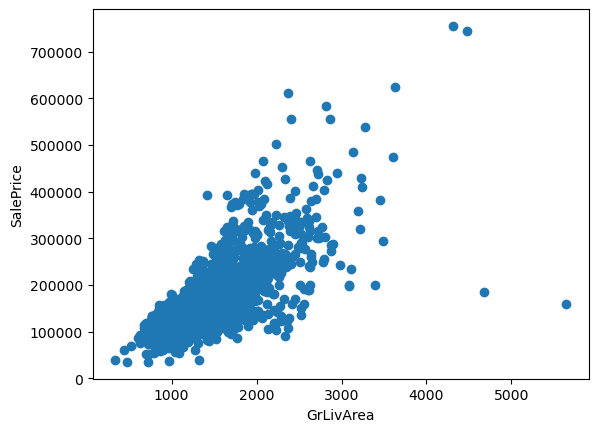

In [27]:
#GrLivArea
plt.scatter(df['GrLivArea'],df['SalePrice']) #plot the scatter plot of GrLivArea and SalePrice
plt.xlabel('GrLivArea') #label the x axis
plt.ylabel('SalePrice') #label the y axis
plt.show() #show the plot

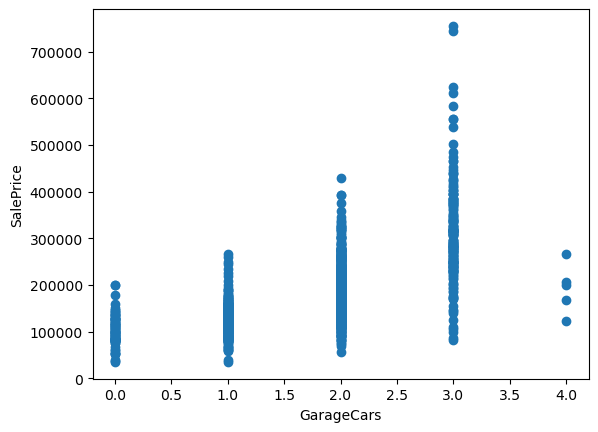

In [28]:
#GarageCars
plt.scatter(df['GarageCars'],df['SalePrice']) #plot the scatter plot of GarageCars and SalePrice
plt.xlabel('GarageCars') #label the x axis
plt.ylabel('SalePrice') #label the y axis
plt.show() #show the plot

In [ ]:
#conclusion
#OverallQual
#The correlation between OverallQual and SalePrice is positive, which means that the higher the OverallQual, the higher the SalePrice.
#GrLivArea
#The correlation between GrLivArea and SalePrice is positive, which means that the higher the GrLivArea, the higher the SalePrice.
#GarageCars
#The correlation between GarageCars and SalePrice is positive, which means that the higher the GarageCars, the higher the SalePrice.
#The regression model is good because the MAE, MSE, and RMSE are low.


# Classification Models
### Train two models: logistic regression and random forest for this data and shows the result & evaluation.
- Take dataset: heart.csv from Link
- One Hot Encoding
- Separate into X_train, X_test, y_train, y_test (y = “HeartDisease”) with proportion: 60-40
- Train two models with X_train and y_train (use Hyperparameter Tuning for random forest)
- Evaluate the result with confusion matrix, classification report, and AUC
- Which model is better at predicting Heart Disease? Interpret the reason.

### Take dataset: heart.csv from Link

In [35]:
df2=pd.read_csv("heart.csv")
df2.sample(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
49,41,M,ASY,110,289,0,Normal,170,N,0.0,Flat,1
348,69,M,ASY,137,0,0,ST,104,Y,1.6,Flat,1
82,63,M,ASY,150,223,0,Normal,115,N,0.0,Flat,1
91,39,M,ASY,130,307,0,Normal,140,N,0.0,Up,0
111,57,M,ASY,150,255,0,Normal,92,Y,3.0,Flat,1


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### One Hot Encoding

In [38]:
df2 = pd.get_dummies(df2)
df2.sample(5)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
279,54,130,253,0,155,0.0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,1
749,54,150,232,0,165,1.6,0,0,1,0,...,1,0,1,0,0,1,0,0,0,1
441,69,130,0,1,129,1.0,1,0,1,1,...,0,0,0,0,1,1,0,0,1,0
833,54,120,258,0,147,0.4,0,0,1,0,...,1,0,1,0,0,1,0,0,1,0
460,57,139,277,1,118,1.9,1,0,1,1,...,0,0,0,0,1,0,1,0,1,0


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_F              918 non-null    uint8  
 8   Sex_M              918 non-null    uint8  
 9   ChestPainType_ASY  918 non-null    uint8  
 10  ChestPainType_ATA  918 non-null    uint8  
 11  ChestPainType_NAP  918 non-null    uint8  
 12  ChestPainType_TA   918 non-null    uint8  
 13  RestingECG_LVH     918 non-null    uint8  
 14  RestingECG_Normal  918 non-null    uint8  
 15  RestingECG_ST      918 non-null    uint8  
 16  ExerciseAngina_N   918 non

### Separate into X_train, X_test, y_train, y_test (y = “HeartDisease”) with proportion: 60-40

In [43]:
# from sklearn.model_selection import train_test_split#split the dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(df2.drop(['HeartDisease'],axis=1), df2['HeartDisease'], test_size=0.4, random_state=101)#split the dataset into train and test
#show the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(550, 20)
(368, 20)
(550,)
(368,)


### Train two models with X_train and y_train (use Hyperparameter Tuning for random forest)

In [53]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression #import the logistic regression model
lr = LogisticRegression() #create the logistic regression model
lr.fit(X_train,y_train) #fit the model with the train dataset



C:\jujuLab\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [45]:
#use Hyperparameter Tuning for random forest
from sklearn.ensemble import RandomForestClassifier #import the random forest model

RandomForestClassifier()

In [48]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [49]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [50]:
from sklearn.model_selection import GridSearchCV

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [51]:
grid_search.best_score_

0.8799851898868084

In [52]:
rf_best = grid_search.best_estimator_
rf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=25,
                       n_jobs=-1, random_state=42)

In [54]:
y_lr = lr.predict(X_test)
y_rf = rf_best.predict(X_test)

### Evaluate the result with confusion matrix, classification report, and AUC

In [55]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_lr))
print(accuracy_score(y_test, y_rf))

0.8559782608695652
0.8369565217391305


In [56]:
from sklearn.metrics import precision_score
print(precision_score(y_test, y_lr, average='macro'))
print(precision_score(y_test, y_rf, average='macro'))

0.8567977915804003
0.8390179003386551


In [57]:
from sklearn.metrics import recall_score
print(recall_score(y_test, y_lr, average='macro'))
print(recall_score(y_test, y_rf, average='macro'))

0.8532679738562091
0.8330956625074273


In [59]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_lr))
print(confusion_matrix(y_test, y_rf))

[[139  31]
 [ 22 176]]
[[133  37]
 [ 23 175]]


In [60]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_lr, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))
fpr, tpr, thresholds = roc_curve(y_test, y_rf, pos_label=1) # pos_label: positive label
print(auc(fpr, tpr))

0.853267973856209
0.8330956625074272


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_lr))
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       170
           1       0.85      0.89      0.87       198

    accuracy                           0.86       368
   macro avg       0.86      0.85      0.85       368
weighted avg       0.86      0.86      0.86       368

              precision    recall  f1-score   support

           0       0.85      0.78      0.82       170
           1       0.83      0.88      0.85       198

    accuracy                           0.84       368
   macro avg       0.84      0.83      0.83       368
weighted avg       0.84      0.84      0.84       368



In [ ]:
#Which model is better at predicting Heart Disease? Interpret the reason
#The logistic regression model is better at predicting Heart Disease because the AUC of the logistic regression model is higher than the AUC of the random forest model.
#the AUC of the logistic regression model is 0.85 and the AUC of the random forest model is 0.83.
#The logistic regression model is better at predicting Heart Disease because the logistic regression model is a linear model and the random forest model is a non-linear model.
